In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [3]:
!pip install opendatasets
import opendatasets as od

In [4]:
data=od.download('https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression?select=Ice_cream+selling+data.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: SahashRaee
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression


In [8]:
df=pd.read_csv('./polynomial-regression/Ice_cream selling data.csv')

In [9]:
df.sample(5)

,Temperature (°C),Ice Cream Sales (units)
28,1.240712,1.292361
11,-2.288264,18.123991
24,0.688781,2.576782
18,-0.673753,5.210163
0,-4.662263,41.842986


<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

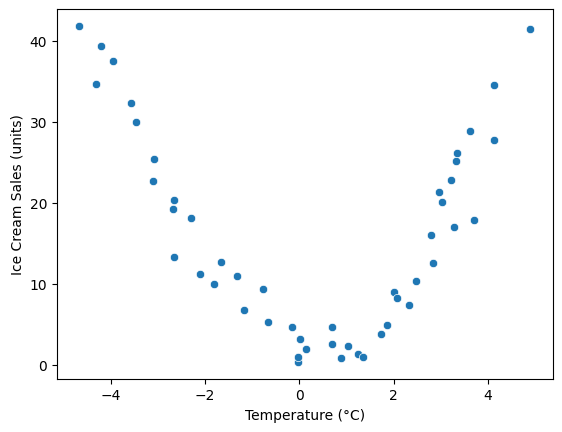

In [12]:
sns.scatterplot(x='Temperature (°C)', y='Ice Cream Sales (units)', data=df)

In [13]:
X=df.iloc[:, 0:1]
y=df.iloc[:, 1]

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train.shape, X_test.shape

((39, 1), (10, 1))

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_predict=lr.predict(X_test)
r2_score(y_predict, X_test)

-225.63557189085012

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

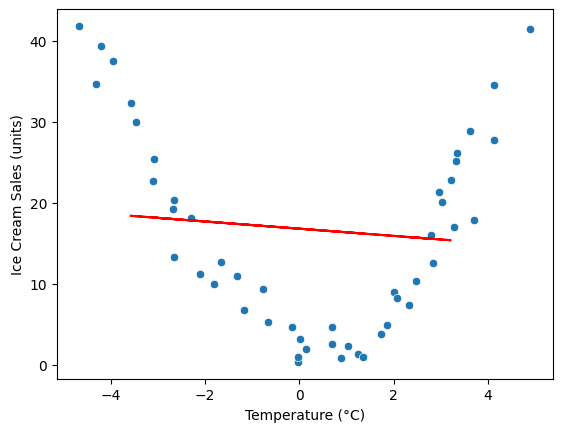

In [22]:
plt.plot(X_test, y_predict, color='red')
sns.scatterplot(x='Temperature (°C)', y='Ice Cream Sales (units)', data=df)


In [45]:
pf=PolynomialFeatures(degree=10)

In [46]:
X_train_transformed=pf.fit_transform(X_train)
X_test_transformed=pf.fit_transform(X_test)

In [47]:
lr2=LinearRegression()

In [48]:
lr2.fit(X_train_transformed, y_train)

LinearRegression()

In [51]:
y_predict2=lr2.predict(X_test_transformed)

from sklearn.metrics import r2_score
r2_score(y_test, y_predict2)

0.9290235936573469

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

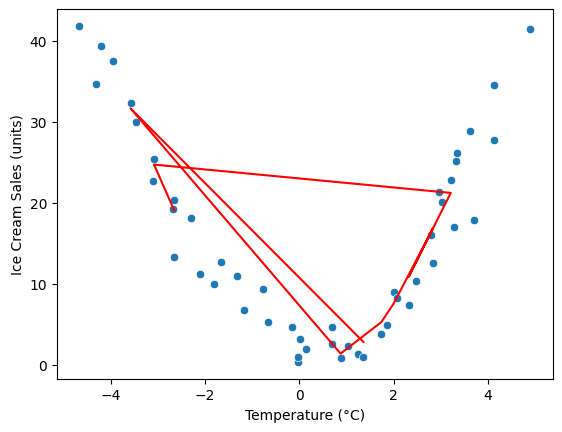

In [50]:
plt.plot(X_test, y_predict2, color='red')
sns.scatterplot(x='Temperature (°C)', y='Ice Cream Sales (units)', data=df)

In [54]:
import plotly.express as px

In [55]:
px.scatter_3d(df, x='Temperature (°C)', y='Ice Cream Sales (units)', z='Temperature (°C)')

In [ ]:
px.scatter_3d